# 簡單線性回歸範例:
- 薪資與年資 對應關係

In [12]:
import pandas as pd

url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(url)
data

# 取出 YearsExperience Salary -> y=w*x+b
x = data['YearsExperience']
y = data['Salary']

In [16]:
import wget
# 下載字體
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

'ChineseFont (1).ttf'

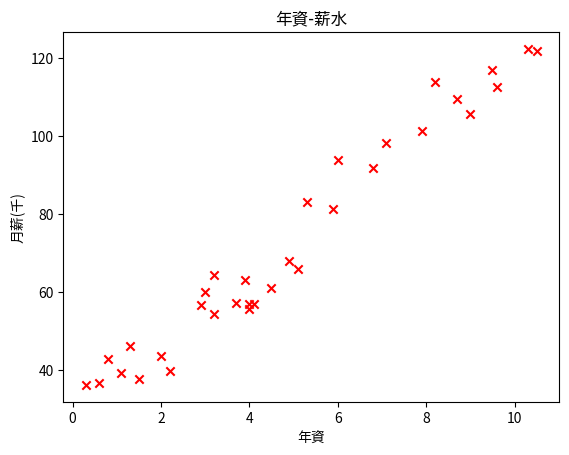

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 新增字體: 預設 matplotlib 不支援中文顯示 -> 需新增字體 並使用字體 
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family='ChineseFont') # 使用字體

plt.scatter(x, y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel('年資')
plt.ylabel('月薪(千)')
# 將資料畫出圖 plt.show()
plt.show()


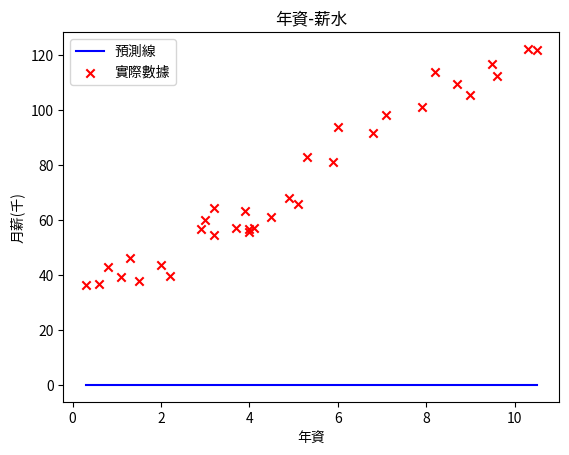

In [23]:
w=0
b=0

y_pred = x*w+b
plt.plot(x, y_pred, color='blue', label='預測線')
plt.scatter(x, y, marker="x", color="red", label='實際數據')
plt.title("年資-薪水")
plt.xlabel('年資')
plt.ylabel('月薪(千)')
# 顯示圖例
plt.legend()
# 將資料畫出圖 plt.show()
plt.show()

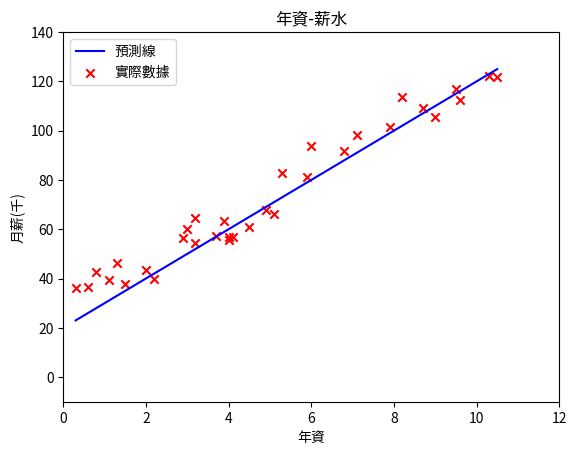

In [37]:
# 編寫函數
def plot_pred(w, b):
    y_pred = x*w+b
    plt.plot(x, y_pred, color='blue', label='預測線')
    plt.scatter(x, y, marker="x", color="red", label='實際數據')
    plt.title("年資-薪水")
    plt.xlabel('年資')
    plt.ylabel('月薪(千)')
    # 設定x,y軸最大/小值
    plt.xlim(0, 12)
    plt.ylim(-10, 140)
    # 顯示圖例
    plt.legend()
    # 將資料畫出圖 plt.show()
    plt.show()

# 傳入 w,b
plot_pred(10, 20)

In [38]:
from ipywidgets import interact

# python 互動元件 interact
interact(plot_pred, w=(-100,100,1), b=(-100,100,1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

In [40]:
# 如何找到最適合資料的直線 -> 尋找線與資料距離的最小值
# cost function 成本函數
# cost = (真實數據 - 預測值)^2

w=10
b=0
y_pred=w*x+b
cost = (y-y_pred)**2
cost.sum() / len(x) # 平均值:平方加總/總數

602.547878787879

In [41]:
# 將 cost 轉換成函式
def compute_cost(x, y, w, b):
    y_pred=w*x+b
    cost = (y-y_pred)**2
    cost = cost.sum() / len(x)

    return cost

compute_cost(x, y, 10, 0)

602.547878787879

In [42]:
# 假設 b=0, w=-100~100 求cost
costs = []
for w in range(-100, 101):
    cost = compute_cost(x,y,w,0)
    costs.append(cost)

costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

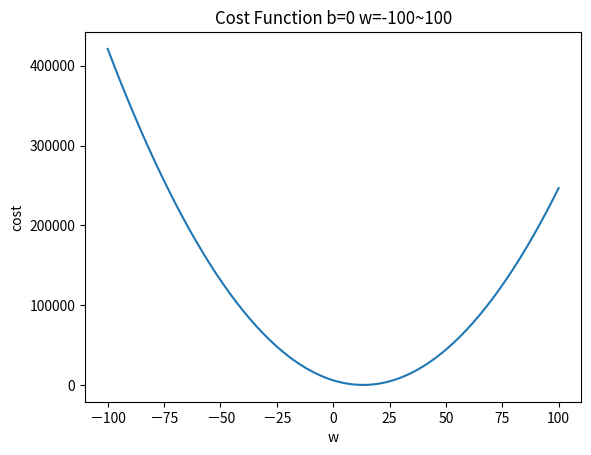

In [47]:
# 將不同w對應的cost 作圖
import matplotlib.pyplot as plt

# 點圖
# plt.scatter(range(-100,101), costs)
# 線圖
plt.plot(range(-100,101), costs)
plt.title('Cost Function b=0 w=-100~100')
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

In [48]:
# w=-100~100 & b=-100~100 的 cost
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)

costs = np.zeros((201, 201)) # 建立一個空白2維矩陣

i=0
for w in ws:
    j=0
    for b in bs:
        cost = compute_cost(x,y,w,b)
        costs[i,j]=cost
        j+=1
    i+=1

costs



array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

當W=[9], b=[29]時，會有最小cost:[32.69484848]


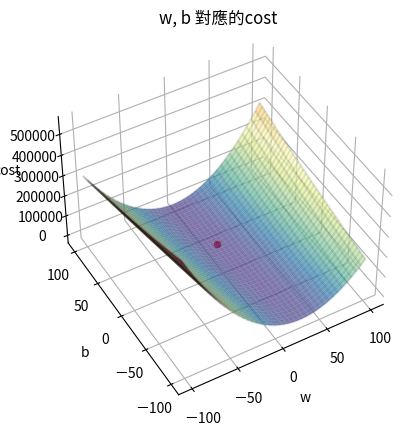

<Figure size 1000x1000 with 0 Axes>

In [68]:
# 將 costs 的值做圖
ax = plt.axes(projection='3d')
plt.figure(figsize=(10, 10))
ax.view_init(45,-120)


ax.xaxis.set_pane_color('#ffffff')
ax.yaxis.set_pane_color('#ffffff')
ax.zaxis.set_pane_color('#ffffff')

b_grid, w_grid = np.meshgrid(bs, ws) # 建立二維網格
ax.plot_surface(w_grid, b_grid, costs, cmap='Spectral_r', alpha=0.7) # cmap:漸層設定 alpha:透明度
ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.1) # 加入邊框

ax.set_title('w, b 對應的cost')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')

# 找出最低點(最小值)
# print(np.min(costs))
w_index, b_index = np.where(costs==np.min(costs))
print(f'當W={ws[w_index]}, b={bs[b_index]}時，會有最小cost:{costs[w_index, b_index]}' )

# 畫出 costs 最小值的位置
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color='red')

plt.show()